In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from ipywidgets import interact, fixed
import ipywidgets as widgets

from ipywidgets import interactive, interact, HBox, Layout, VBox

dataDict = np.load('/home/alessio/n-Propagation/datanewoneWithNACnow.npy')[()]
print('npy loaded')
name_data_file = '/home/alessio/n-Propagation/newExtrapolated_gammaExtrExag.pickle'
data = qp.pickleLoad(name_data_file)
print('Pickle loaded')
dataDict.keys(), data.keys()


output_folder = '/home/alessio/k-nokick/IMPORTANTS/CHANGE_NACS'

npy loaded
Pickle loaded


In [2]:
nac_car_no_mass = dataDict['nacCUBE'][:, :, :, :, :, 7:, :]
nac_int = data['smoCube'][15:-15, 15:-15, 30:-30, :, :, :]
print('{} {}'.format(nac_car_no_mass.shape, nac_int.shape))

phis_ext = qp.labTranformA(data['phis'])
gams_ext = qp.labTranformA(data['gams'])
thes_ext = qp.labTranformA(data['thes'])

phiV_ext, gamV_ext, theV_ext = qp.fromLabelsToFloats(data)
phis = phis_ext[15:-15]
gams = gams_ext[15:-15]
thes = thes_ext[30:-30]
phiV = phiV_ext[15:-15]
gamV = gamV_ext[15:-15]
theV = theV_ext[30:-30]

dimV = {'Phi': phiV, 'Gam': gamV, 'The': theV}  # real values
dims = {'Phi': phis, 'Gam': gams, 'The': thes}  # for labels

kinds = ['Phi', 'Gam', 'The']


25*26*100

(25, 26, 100, 8, 8, 8, 3) (25, 26, 100, 8, 8, 3)


65000

In [3]:
umass = 1836

C_mass = 12 * umass
H_mass = 1 * umass

massVector = np.array([C_mass, C_mass, C_mass, C_mass, C_mass, C_mass, C_mass, C_mass, C_mass, C_mass, C_mass,
                       C_mass, H_mass, H_mass, H_mass, H_mass, H_mass, H_mass, H_mass, H_mass, H_mass, H_mass, H_mass, H_mass])
massVector2 = massVector.reshape(8, 3)

# this division, incredibly, works as expected.
# massVector2(8,3) is the same array size that the last 2 dimension of nac_car_no_mass(:,:,:,:,:,8,3).
# This means that they are multiplied ELEMENTWISE, that is exactly what I want to do.

nac_car = nac_car_no_mass / massVector2

<IPython.core.display.Javascript object>


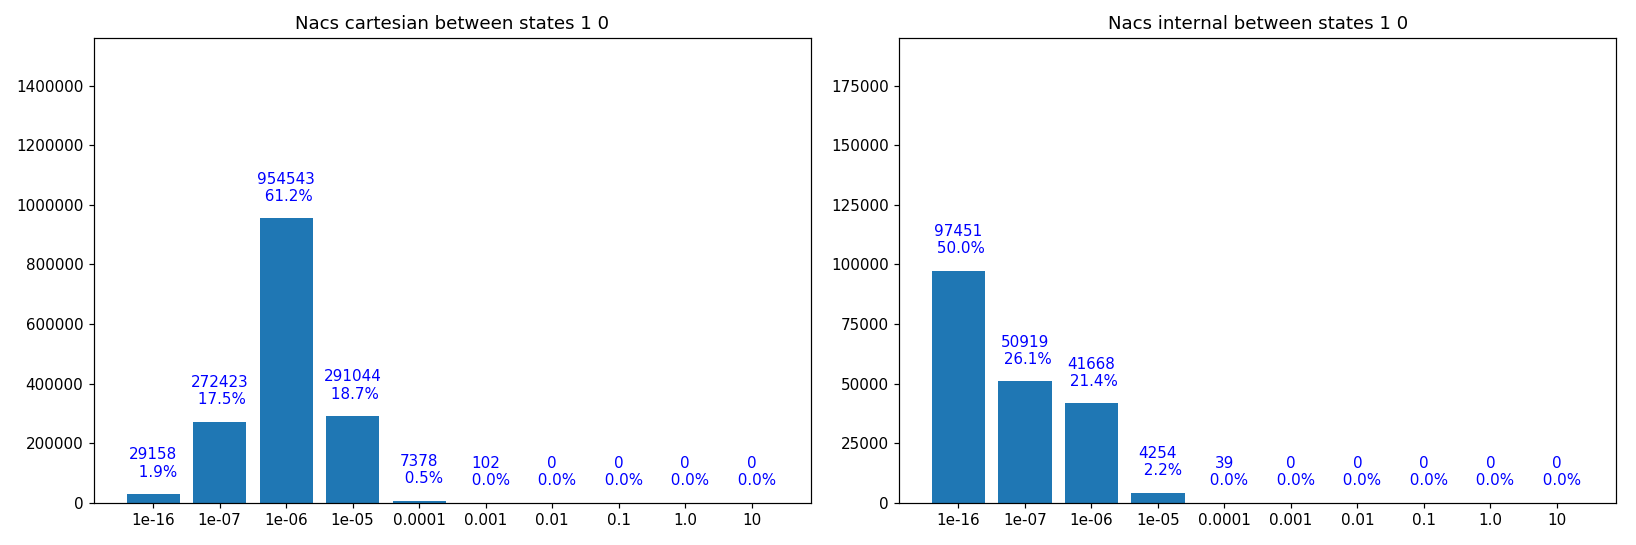

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

makeGraph = True

states_to_plot = 2

if makeGraph:
    for s1 in range(states_to_plot):
        for s2 in range(s1):

            # INTERNAL
            a = np.abs(nac_int[:, :, :, s1, s2, :].flatten())
            len_a = a.size

            # CARTESIAN
            b = np.abs(nac_car[:, :, :, s1, s2, :, :].flatten())
            len_b = b.size

            binZ = [0.0000000000000001, 0.0000001, 0.000001, 0.00001, 0.0001,
                    0.001, 0.01, 0.1, 1.0, 10, 1000000000]  # last one is not displayed
            # thing here is the integer where I plot the bar (x position)
            thing = np.arange(len(binZ)-1)
            label_names = ['{}'.format(x) for x in binZ]

            counts_a, bins_a = np.histogram(a, bins=binZ)
            counts_b, bins_b = np.histogram(b, bins=binZ)

            fig, (ax1, ax0) = plt.subplots(1, 2, figsize=(15, 5))

            ax0.bar(thing, counts_a)
            ax1.bar(thing, counts_b)

            for xy in zip(thing, counts_a):
                percentage = (xy[1]/len_a)*100
                ax0.annotate('{}\n{:5.1f}%\n'.format(
                    xy[1], percentage), xy=xy, color='blue', ha='center')
            for xy in zip(thing, counts_b):
                percentage = (xy[1]/len_b)*100
                ax1.annotate('{}\n{:5.1f}%\n'.format(
                    xy[1], percentage), xy=xy, color='blue', ha='center')

            ax0.set_xticks(thing, minor=False)
            ax0.set_xticklabels(label_names, fontdict=None, minor=False)
            ax0.set_title('Nacs internal between states {} {}'.format(s1, s2))
            ax0.set_ylim(0, len_a)

            ax1.set_xticks(thing, minor=False)
            ax1.set_xticklabels(label_names, fontdict=None, minor=False)
            ax1.set_title('Nacs cartesian between states {} {}'.format(s1, s2))
            ax1.set_ylim(0, len_b)

            plt.tight_layout()

# Norm product

/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


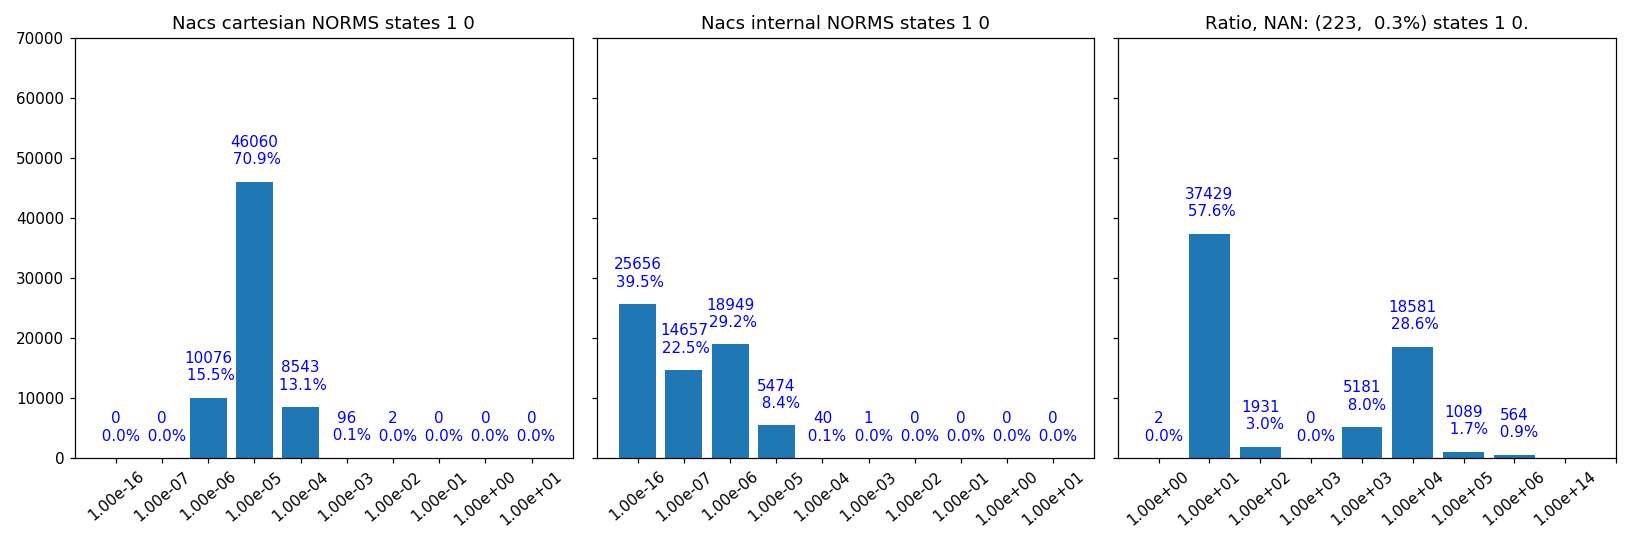

In [5]:
# then create a cube and a histogram for the RATIOS, how much we lose by pojecting cartesian to internal space
# then visualize the cube
## smooth and multiply


makeGraph = True
states_to_plot = 2

norms_car = np.linalg.norm(nac_car, axis=(5, 6))
norms_int = np.linalg.norm(nac_int, axis=5)


all_cubes = []

if makeGraph:
    for s1 in range(states_to_plot):
        for s2 in range(s1):

            # INTERNAL
            a = np.abs(norms_int[:, :, :, s1, s2].flatten())
            len_a = a.size

            # CARTESIAN
            b = np.abs(norms_car[:, :, :, s1, s2].flatten())
            len_b = b.size

            c2 = b/a

            how_many_zero = np.argwhere(np.isnan(c2)).size
            percent_how_many_nan = (how_many_zero/65000)*100

            c = np.nan_to_num(c2)
            len_c = c.size

            all_cubes.append(c2)  # here I want the one with

            binZ = [0.0000000000000001, 0.0000001, 0.000001, 0.00001, 0.0001,
                    0.001, 0.01, 0.1, 1.0, 10, 1000000000]  # last one is not displayed
            binZ2 = [1, 10, 100, 1000, 1000, 10000, 100000, 1000000,
                     100000000000000]  # last one is not displayed

            # thing here is the integer where I plot the bar (x position)
            thing = np.arange(len(binZ)-1)
            label_names = ['{:5.2e}'.format(x) for x in binZ]

            thing2 = np.arange(len(binZ2)-1)
            label_names2 = ['{:5.2e}'.format(x) for x in binZ2]

            counts_a, bins_a = np.histogram(a, bins=binZ)
            counts_b, bins_b = np.histogram(b, bins=binZ)
            counts_c, bins_c = np.histogram(c, bins=binZ2)

            fig, [ax1, ax0, ax2] = plt.subplots(
                1, 3, figsize=(15, 5), sharey=True)

            ax0.bar(thing, counts_a)
            ax1.bar(thing, counts_b)
            ax2.bar(thing2, counts_c)

            for xy in zip(thing, counts_a):
                percentage = (xy[1]/len_a)*100
                ax0.annotate('{}\n{:5.1f}%\n'.format(
                    xy[1], percentage), xy=xy, color='blue', ha='center')
            for xy in zip(thing, counts_b):
                percentage = (xy[1]/len_b)*100
                ax1.annotate('{}\n{:5.1f}%\n'.format(
                    xy[1], percentage), xy=xy, color='blue', ha='center')
            for xy in zip(thing, counts_c):
                percentage = (xy[1]/len_c)*100
                ax2.annotate('{}\n{:5.1f}%\n'.format(
                    xy[1], percentage), xy=xy, color='blue', ha='center')

            y_lim_up = 70000

            ax0.set_xticks(thing, minor=False)
            ax0.set_xticklabels(label_names, fontdict=None,
                                minor=False, rotation=40)
            ax0.set_title('Nacs internal NORMS states {} {}'.format(s1, s2))
            ax0.set_ylim(0, y_lim_up)

            ax1.set_xticks(thing, minor=False)
            ax1.set_xticklabels(label_names, fontdict=None,
                                minor=False, rotation=40)
            ax1.set_title('Nacs cartesian NORMS states {} {}'.format(s1, s2))
            ax1.set_ylim(0, y_lim_up)

            ax2.set_xticks(thing, minor=False)
            ax2.set_xticklabels(label_names2, fontdict=None,
                                minor=False, rotation=40)
            ax2.set_title('Ratio, NAN: ({},{:5.1f}%) states {} {}.'.format(
                how_many_zero, percent_how_many_nan, s1, s2))
            ax2.set_ylim(0, y_lim_up)

            plt.tight_layout()

# Nac postprocessing

In [42]:
import bottleneck as bn

arrayZ = norms_car
#arrayZ = beforeSmoothing[:,:,:,:,:,2]


np.unravel_index(arrayZ.argmax(), arrayZ.shape)
np.sort(bn.partition(arrayZ.flatten(), arrayZ.size-20)[-20:])


array([ 1.65018699,  1.65018699,  1.67992134,  1.67992134,  1.84136567,
        1.84136567,  1.93737369,  1.93737369,  1.97412869,  1.97412869,
        2.10328745,  2.10328745,  2.38245296,  2.38245296,  3.02686641,
        3.02686641,  3.5990737 ,  3.5990737 ,  4.72193072,  4.72193072])

In [43]:
# I use this cell to do some kind of statistics. and to visualize spikes in 3d

#indexes_g = np.nonzero(arrayZ == 0.0) # 309634.0 2080000.0
#indexes_g = np.nonzero(arrayZ < 0.0001) # 1469701.0 2080000.0
#indexes_g = np.nonzero(arrayZ < 0.0001) # 379195.0 2080000.0

pL, gL, tL, nstates, _ = arrayZ.shape

thresh_low = 0.001
thresh_high = 0.5

indexes_g = np.nonzero(arrayZ > thresh_high)
indexes_noise = np.nonzero(arrayZ < thresh_low)
zeroes_array = np.nonzero(arrayZ == 0.0)

# how many higher than thresh_high
htth = indexes_g[0].size
# how many lower than thresh_low
lttl = indexes_noise[0].size
# how many zeros
z = zeroes_array[0].size

total_size = arrayZ.size

print('Total : {}\nHigher than thres: {} {}%\nLower than thresh: {} {}%\nZeroes: {}'.format(total_size,htth,(htth/total_size)*100,lttl,(lttl/total_size)*100,z))

a,b,c,d,e = indexes_g

cube_visualizator = np.zeros((pL, gL, tL, nstates))

t_sx = 22
t_dx = 70

list_of_spikes = []
for i in range(len(indexes_g[0])):
    if d[i] > e[i]:
        list_of_spikes.append([a[i],b[i],c[i],d[i],e[i]])
        cube_visualizator[a[i],b[i],c[i],d[i]] = 99
        if c[i] > t_sx and c[i] < t_dx:
            print('[{},{},{},{},{}] = {}'.format(a[i],b[i],c[i],d[i],e[i],arrayZ[a[i],b[i],c[i],d[i],e[i]]))


list_of_spikes

dictio = {}
dictio['WF'] = np.pad(cube_visualizator, ((15,15),(15,15),(30,30),(0,0)), 'constant')
dictio['Time'] = [0.0,0.0]

qp.writeH5fileDict('/home/alessio/k-nokick/IMPORTANTS/CHANGE_NACS/Gaussian0000.h5', dictio)
    
# watch out for [12,4,73,2,3]

Total : 4160000
Higher than thres: 92 0.002211538461538462%
Lower than thresh: 4056578 97.51389423076922%
Zeroes: 619268
[7,7,56,5,4] = 0.5262758225079355
[8,12,60,5,4] = 0.5296118015570003
[12,12,62,5,4] = 0.9018418755181805
[16,17,23,6,5] = 0.7416209967603737
[17,11,47,5,4] = 1.1011659935324556


In [44]:
pL, gL, tL, nstates, _ = norms_car.shape

without_borders = np.copy(norms_car)

# those are norms, so always positive

for p in range(pL):
    for g in range(gL):
        for t in range(tL):
            for s1 in range(nstates):
                for s2 in range(nstates):
                    if s1 != s2:
                        if without_borders[p,g,t,s1,s2] < thresh_low:
                            without_borders[p,g,t,s1,s2] = 0.0
                        if without_borders[p,g,t,s1,s2] > thresh_high:
                            if t < t_sx or t > t_dx:   # here I wanted to take out points that are out of the zones we explore with WPs. It was in theta the easiest filter I could do
                                without_borders[p,g,t,s1,s2] = 0.0
                            

                            

In [45]:

# those are the norm vectors
print(without_borders.shape, norms_int.shape)

# This is the norm step. here we find which values we should rescale at which point. When without_borders is 0, I obtain NANs, that I have to remove.

multiplicative_factor = np.nan_to_num(without_borders/norms_int)

beforeSmoothing = np.empty_like(nac_int)

for c in range(3):
    beforeSmoothing[:,:,:,:,:,c] = nac_int[:,:,:,:,:,c] * multiplicative_factor
    

padded_final = np.pad(beforeSmoothing, ((15,15),(15,15),(30,30),(0,0),(0,0),(0,0)), 'constant')
padded_multiplicative_factor = np.pad(multiplicative_factor, ((15,15),(15,15),(30,30),(0,0),(0,0)), 'constant')
padded_norms_car = np.pad(norms_car, ((15,15),(15,15),(30,30),(0,0),(0,0)), 'constant')
print(padded_final.shape)

(25, 26, 100, 8, 8) (25, 26, 100, 8, 8)


/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


(55, 56, 160, 8, 8, 3)


In [46]:
import os

savefile = True
array_here1 = padded_final
array_here2 = data['smoCube']
array_here3 = padded_multiplicative_factor
array_here4 = padded_norms_car

folder = '/home/alessio/NAC_SMOOTHING'
name_here1 = 'd-Final_values'
name_here2 = 'e-before'
name_here3 = 'multiplic'
name_here4 = 'cartesian_norms'

if savefile:
    for i in qp.log_progress(range(8),every=1,size=(8)):
        for j in range(i):
            name3 = '{}_{}_{}'.format(name_here3,i,j)
            filepath3 = os.path.join(folder,name3)
            np.savetxt(filepath3, array_here3[:,:,:,i,j].flatten())
            name4 = '{}_{}_{}'.format(name_here4,i,j)
            filepath4 = os.path.join(folder,name4)
            np.savetxt(filepath4, array_here4[:,:,:,i,j].flatten())
            for c in range(3):
                name1 = '{}_{}_{}_{}'.format(name_here1,i,j,c)
                name2 = '{}_{}_{}_{}'.format(name_here2,i,j,c)
                filepath1 = os.path.join(folder,name1)
                filepath2 = os.path.join(folder,name2) 
                np.savetxt(filepath1, array_here1[:,:,:,i,j,c].flatten())
                np.savetxt(filepath2, array_here2[:,:,:,i,j,c].flatten())


A Jupyter Widget

In [79]:
# What is the average scalar product in 24 dimensions of a random normal distribution with respect to one fixed vector.

def giveme(a):
    vector = np.random.normal(size=(8,3))
    norm_vector = np.linalg.norm(vector)
    normalized = vector/norm_vector
    return(np.dot(a.flatten(),normalized.flatten()))


fn = '/home/alessio/Desktop/a-3dScanSashaSupport/b-BranchingCI/DerCoup'

a=np.loadtxt(fn)

average = np.average(np.abs([ giveme(a[7:]) for i in range(50000) ]))  # 50K is good enough

print(average)

0.164499076972


In [33]:
def do3dplot(xs, ys, zss, z_lim):
    'with mesh function'
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(ys, xs)
    #ax.set_zlim(-1, 1)
    #ax.scatter(X, Y, zss)
    ax.plot_wireframe(X, Y, zss)

    if z_lim != 0:
        z_lim = 0.00001
        ax.set_zlim(-z_lim, z_lim)
    fig.tight_layout()


def visualize_this_thing(thing, state1, state2, cart, kind, dim, z_lim):
    along = ['Phi', 'Gam', 'The']
    print('NAC between state ({},{}) along {}\nDoing cut in {} with value ({:8.4f},{:8.4f})'.format(state1,
                                                                                                    state2,
                                                                                                    along[cart],
                                                                                                    kind,
                                                                                                    dimV[kind][dim],
                                                                                                    dims[kind][dim]))
    print(thing.shape)

    if kind == 'Phi':
        pot = thing[dim, :, :, state1, state2, cart]
        do3dplot(gams, thes, pot, z_lim)
        print('\nLooking at SMO with indexes [{},:,:,{},{},{}]'.format(
            dim, state1, state2, cart))
    elif kind == 'Gam':
        pot = thing[:, dim, :, state1, state2, cart]
        do3dplot(phis, thes, pot, z_lim)
        print('\nLooking at SMO with indexes [:,{},:,{},{},{}]'.format(
            dim, state1, state2, cart))
    elif kind == 'The':
        pot = thing[:, :, dim, state1, state2, cart]
        do3dplot(phis, gams, pot, z_lim)
        print('\nLooking at SMO with indexes [:,:,{},{},{},{}]'.format(
            dim, state1, state2, cart))


def fun_pot2D(kind, state1, state2, cart, dim, z_lim):
    visualize_this_thing(nac_int, state1, state2, cart, kind, dim, z_lim)


def nested(kinds):
    dimensionV = dimV[kinds]
    widget2 = interactive(fun_pot2D, kind=fixed(kinds),
                          state1=widgets.IntSlider(
                              min=0, max=7, step=1, value=0, continuous_update=False),
                          state2=widgets.IntSlider(
                              min=0, max=7, step=1, value=0, continuous_update=False),
                          cart=widgets.IntSlider(
                              min=0, max=2, step=1, value=0, continuous_update=False),
                          dim=widgets.IntSlider(min=0, max=(
                              len(dimensionV)-1), step=1, value=0, continuous_update=False),
                          z_lim=widgets.FloatText(value=0))
    controls2 = HBox(widget2.children[:-1],
                     layout=Layout(flex_flow='row wrap'))
    output2 = widget2.children[-1]
    display(VBox([controls2, output2]))


widget = interactive(nested, kinds=['Phi', 'Gam', 'The'])
controls = HBox(widget.children[:-1], layout=Layout(flex_flow='row wrap'))
output = widget.children[-1]
display(VBox([controls, output]))

A Jupyter Widget

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

cube_nac = norms_car[:,:,:,0,1]

tupl = cube_nac.shape
cube_nac.shape,phiV.shape,gamV.shape,theV.shape

phi_mesh, gam_mesh, the_mesh =  np.meshgrid(phiV,gamV,theV, indexing='ij')

phi_prime = phi_mesh.reshape(-1,1)
gam_prime = gam_mesh.reshape(-1,1)
the_prime = the_mesh.reshape(-1,1)

X = np.concatenate((phi_prime,gam_prime,the_prime), axis=1)

y = cube_nac.reshape(-1,1)

poly = PolynomialFeatures(degree=10)

X_ = poly.fit_transform(X)

clf = LinearRegression()
clf.fit(X_, y)

prediction = clf.predict(X_)
prediction_reshaped = prediction.reshape(tupl)

print(prediction_reshaped.shape)


(25, 26, 100)


# MATLAB

In [82]:
# to save vectors for matlab

savefile = False

if savefile:
    for i in range(8):
        for j in range(i):
            for c in range(3):
                name = 'a-NAC_{}_{}_{}'.format(i,j,c)
                np.savetxt(name, nac_int[:,:,:,i,j,c].flatten())

In [47]:
# to load vectors from matlab
import os

loadFiles = True

new_one_after_matlab = np.empty((55,56,160,8,8,3))

if loadFiles:
    for i in qp.log_progress(range(8),every=1,size=(8)):
        for j in range(i):
            for c in range(3):
                name = 'd-Final_values_{}_{}_{}_smoothed'.format(i,j,c)
                file_this = os.path.join(folder,name)
                vector = np.loadtxt(file_this)
                reshaped = vector.reshape(55,56,160)
                
                # ANTISYMMETRIC                
                new_one_after_matlab[:,:,:,i,j,c] = reshaped
                new_one_after_matlab[:,:,:,j,i,c] = -reshaped

                

A Jupyter Widget

(55, 56, 160, 8, 8, 3) (55, 56, 160, 8, 8, 3)


<IPython.core.display.Javascript object>


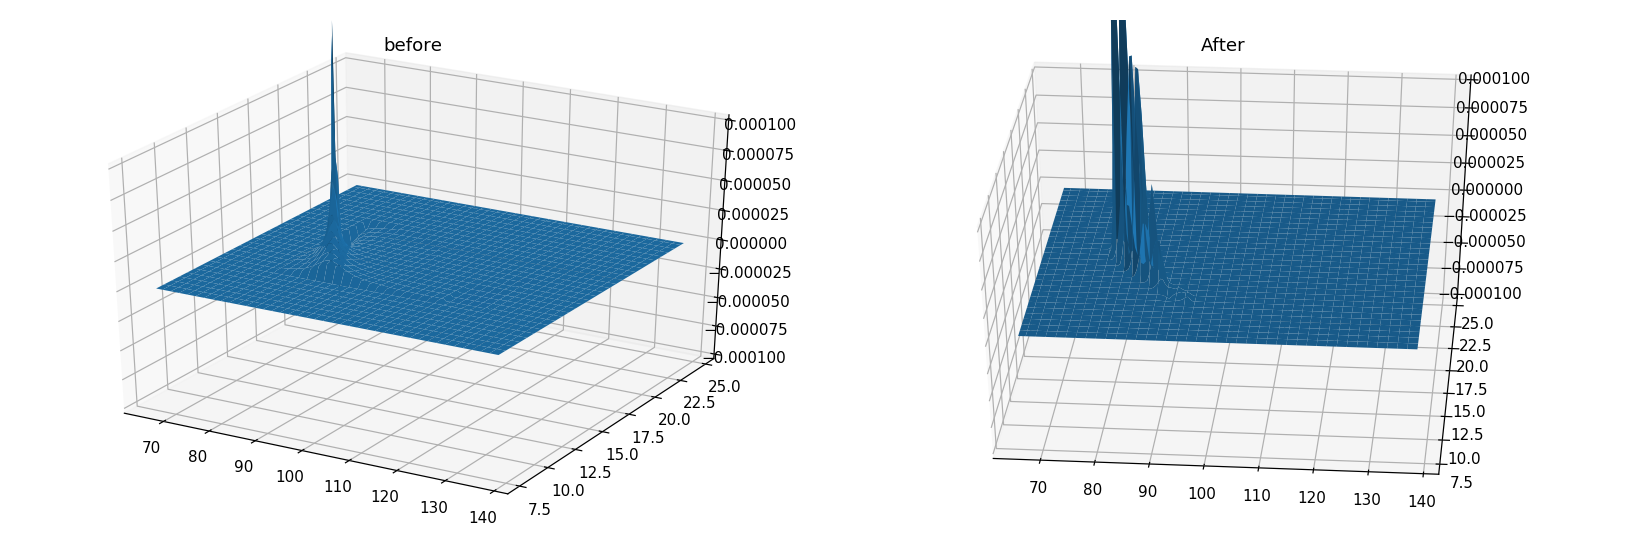

In [50]:
def plot_two_of_them(thing1, thing2, p, s1, s2, c, z_lim):
    print(thing1.shape, thing2.shape)
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    if z_lim != 0:
        ax1.set_zlim(-z_lim, z_lim)
        ax2.set_zlim(-z_lim, z_lim)

    pot1 = thing1[p, :, :, s1, s2, c]
    pot2 = thing2[p, :, :, s1, s2, c]
    gams_x, thes_y = np.meshgrid(thes_ext, gams_ext)

    ax1.plot_surface(gams_x, thes_y, pot1)
    ax1.set_title('before')
    ax2.plot_surface(gams_x, thes_y, pot2)
    ax2.set_title('After')

    fig.tight_layout()


state1 = 1
state2 = 0
cartesian = 2
i = 18

# for i in range(15,42,1):
plot_two_of_them(data['smoCube'], new_one_after_matlab,
                 i, state1, state2, cartesian, 0.0001)

In [53]:
import pickle

print(data['smoCube'].shape==new_one_after_matlab.shape)

new_data = data
new_data['smoCube'] = new_one_after_matlab

saveFile = True
if saveFile:
    with open(os.path.join(folder,'2019-May-min0.001.pickle'), 'wb') as f:
        pickle.dump(new_data, f, pickle.HIGHEST_PROTOCOL)
        #np.save('newExtrapolated_allCorrection.npy', newdict)
        #qp.printDict(new_data)


True


In [54]:
def visualize_Norm_Value(thing1,thing2,thing3,state1,state2,kind,dim,z_lim):
    string_out = 'NAC Norm value between state ({},{}) at {}={}'
    dimensionV = dimV[kind]
    print(string_out.format(state1,state2,kind,dimensionV[dim]))

    fig = plt.figure(figsize=(15,5))    
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    
    if z_lim != 0:
        z_lim = 0.00001
        ax1.set_zlim(-z_lim,z_lim)
        ax2.set_zlim(-z_lim,z_lim)
        ax3.set_zlim(-z_lim,z_lim)
        
    fig.tight_layout()
    
    if kind == 'Phi':
        pot1 = thing1[dim,:,:,state1,state2]
        pot2 = thing2[dim,:,:,state1,state2]
        pot3 = thing3[dim,:,:,state1,state2]
        gams_x,thes_y = np.meshgrid(thes, gams)

        ax1.plot_surface(gams_x, thes_y, pot1)
        ax2.plot_surface(gams_x, thes_y, pot2)
        ax3.plot_surface(gams_x, thes_y, pot3)
        print('\nLooking at SMO NORM VALUES IN CARTESIAN when indexes [{},:,:,{},{}]'.format(dim, state1,state2))

#     elif kind == 'Gam':
#         pot = thing[:,dim,:,state1,state2,cart]
#         do3dplot(phis,thes,pot,z_lim)
#         print('\nLooking at SMO NORM VALUES IN CARTESIAN when indexes [:,{},:,{},{},{}]'.format(dim, state1,state2,cart))
#     elif kind == 'The':        
#         pot = thing[:,:,dim,state1,state2,cart]
#         do3dplot(phis,gams,pot,z_lim)
#         print('\nLooking at SMO NORM VALUES IN CARTESIAN when indexes [:,:,{},{},{},{}]'.format(dim, state1,state2,cart))

 

visualize_Norm_Value(norms_int,norms_car,norms_multiplicator,2,1,'Phi',9,0)

NameError: name 'norms_multiplicator' is not defined

In [55]:
savefile = False

if savefile:
    for i in range(8):
        for j in range(i):
            name1 = 'b-NAC_norms_int_{}_{}'.format(i,j)
            name2 = 'b-NAC_norms_car_{}_{}'.format(i,j)
            np.savetxt(name1, norms_int[:,:,:,i,j].flatten())
            np.savetxt(name2, norms_car[:,:,:,i,j].flatten())

In [56]:
norms_multiplicator = np.zeros_like(norms_car)

for s1 in range(8):
    for s2 in range(s1):
        norms_multiplicator[:,:,:,s1,s2] = norms_car[:,:,:,s1,s2]/norms_int[:,:,:,s1,s2]

norms_multiplicator

/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([[[[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          [  5.71571699e+01,   0.00000000e+00,   0.00000000e+00, ...,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          [  7.47351417e+01,   2.41122993e+01,   0.00000000e+00, ...,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          ..., 
          [  2.51260222e+03,   2.39798611e+03,   3.08478963e+03, ...,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          [  2.73770407e+01,   2.79841224e+01,   2.42909803e+01, ...,
             7.82206489e+02,   0.00000000e+00,   0.00000000e+00],
          [  2.42787281e+01,   3.95207959e+01,   1.61227589e+01, ...,
             1.80827416e+03,   1.79835159e+01,   0.00000000e+00]],

         [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          [  5.97745490e+01,  

In [57]:
np.argwhere(np.isnan(norms_multiplicator)).size, norms_multiplicator.size

(248170, 4160000)

In [58]:
np.amax(norms_multiplicator)

nan

# STARTING TO RESHAPE THOSE NACS

In [46]:
# # working on internal NAC cube -> nac_int
# pL,gL,tL,nstates,_,cartL = nac_int.shape

# new_one = np.copy(nac_int)

# for p in range(pL):
#     for g in range(gL):
#         for t in range(tL):
#             for s1 in range(nstates):
#                 for s2 in range(nstates):
#                     for c in range(cartL):
#                         if s1 != s2:
#                             if nac_int[p,g,t,s1,s2,c] == 0.0:
#                                 #print('{} {} {} {} {} {} replacing {} with nan'.format(p,g,t,s1,s2,c,nac_int[p,g,t,s1,s2,c]))
#                                 new_one[p,g,t,s1,s2,c] = np.nan



In [47]:
# from scipy.interpolate import RegularGridInterpolator

# new_slice = new_one[:,:,:,1,0,0]

# pi = np.arange(pL)
# gi = np.arange(gL)
# ti = np.arange(tL)

# my_interpolating_function = RegularGridInterpolator((pi, gi, ti), new_slice)

# my_interpolating_function([[6,19,38],[1,19,38]])

# for p in range(pL):
#     for g in range(gL):
#         for t in range(tL):
#             if np.isnan(data[p,g,t]):
#                 print('{} {} {} = {}'.format(p,g,t,my_interpolating_function((p,g,t))))
#                 data[p,g,t] = my_interpolating_function([p,g,t])

# data[np.isnan(data)] = my_interpolating_function(np.isnan(data))
# new_one[np.isnan(new_one)]

array([  1.33772193e-10,              nan])